<a href="https://colab.research.google.com/github/Badsnowflake/technical-analysis/blob/main/SIGMAQFinal_MASTERS_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d justinas/startup-investments

 96% 111M/115M [00:01<00:00, 120MB/s] 
100% 115M/115M [00:01<00:00, 104MB/s]


In [ ]:
! unzip /content/startup-investments.zip

Archive:  /content/startup-investments.zip
  inflating: acquisitions.csv        
  inflating: degrees.csv             
  inflating: funding_rounds.csv      
  inflating: funds.csv               
  inflating: investments.csv         
  inflating: ipos.csv                
  inflating: milestones.csv          
  inflating: objects.csv             
  inflating: offices.csv             
  inflating: people.csv              
  inflating: relationships.csv       


# Import data

In [ ]:
#### RUN THE GOOGLE COLAB IMPORT FUNCTION IF THE ABOVE DOSENT WORK#####~~~
from google.colab import files 
uploaded = files.upload()

Saving funding_rounds.csv to funding_rounds.csv
Saving objects.csv to objects.csv


In [ ]:
import pandas as pd

funding_rounds = pd.read_csv("funding_rounds.csv")
objects = pd.read_csv("objects.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Cleaning

In [ ]:
missing_values_count = objects.isnull().sum().sum()
missing_values_count

7917473

In [ ]:
funding_rounds.columns

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [ ]:
funding_rounds = funding_rounds.drop(columns=[ 'created_at', 'updated_at', 'created_by', 
                                               'raised_amount', 'raised_currency_code', 'pre_money_valuation', 'post_money_valuation_usd',
                                               'pre_money_currency_code', 'id', 'post_money_valuation', 'pre_money_valuation_usd', 
                                               'post_money_currency_code', 'source_url'])
funding_rounds['funded_at'] = pd.to_datetime(funding_rounds['funded_at'])
funding_rounds['funding_round_type'] = funding_rounds['funding_round_type'].astype('category')
funding_rounds['funding_round_code'] = funding_rounds['funding_round_code'].astype('category')
funding_rounds['is_first_round'] = funding_rounds['is_first_round'].astype('category')
funding_rounds['is_last_round'] = funding_rounds['is_last_round'].astype('category')

funding_rounds.loc[(funding_rounds['funding_round_code'] == 'angel') & 
                   (funding_rounds['funding_round_type'] == 'series-a'), 'funding_round_type'] = 'angel'

funding_rounds.loc[(funding_rounds['funding_round_code'] == 'seed') & 
                   (funding_rounds['funding_round_type'] == 'series-a'), 'funding_round_type'] = 'angel'

In [ ]:
objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [ ]:
new_objects = objects.drop(columns=['normalized_name', 'permalink', 'created_at', 'updated_at', 'first_investment_at', 'last_investment_at', 'created_by', 'permalink', 'domain', 'twitter_username', 'logo_url', 'overview'])
new_objects['founded_at'] = pd.to_datetime(new_objects['founded_at'])
new_objects['logo_width'] = new_objects['logo_width'].astype(float)
new_objects['logo_height'] = new_objects['logo_height'].astype(float)
new_objects['country_code'] = new_objects['country_code'].astype('category')
new_objects['state_code'] = new_objects['state_code'].astype('category')
new_objects['investment_rounds'] = new_objects['investment_rounds'].astype(int)
new_objects['invested_companies'] = new_objects['invested_companies'].astype(int)
new_objects['first_funding_at'] = pd.to_datetime(new_objects['first_funding_at'])
new_objects['last_funding_at'] = pd.to_datetime(new_objects['last_funding_at'])
new_objects['funding_rounds'] = new_objects['funding_rounds'].astype(int)
new_objects['funding_total_usd'] = pd.to_numeric(new_objects['funding_total_usd'])
new_objects['first_milestone_at'] = pd.to_datetime(new_objects['first_milestone_at'])
new_objects['milestones'] = new_objects['milestones'].astype(int)
new_objects['relationships'] = pd.to_numeric(new_objects['relationships'])

In [ ]:
funding_rounds.head(2)

,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,participants,is_first_round,is_last_round,source_description
0,1,c:4,2006-12-01,series-b,b,8500000.0,2,0,0,NaN
1,2,c:5,2004-09-01,angel,angel,500000.0,2,0,1,NaN


In [ ]:
acquisitions_final = new_objects.merge(funding_rounds, left_on="id", right_on="object_id", how='left')

In [ ]:
start_up = acquisitions_final.dropna(subset=['first_funding_at'])
start_up.shape

(52421, 39)

In [ ]:
start_up.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name', 'category_code',
       'status', 'founded_at', 'closed_at', 'homepage_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'tag_list',
       'country_code', 'state_code', 'city', 'region', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'funding_round_id',
       'object_id', 'funded_at', 'funding_round_type', 'funding_round_code',
       'raised_amount_usd', 'participants', 'is_first_round', 'is_last_round',
       'source_description'],
      dtype='object')

In [ ]:
start_up=start_up.dropna(subset=['name'])
start_up.shape

(52421, 39)

In [ ]:
start_up.head()

,id,entity_type,entity_id,parent_id,name,category_code,status,founded_at,closed_at,homepage_url,...,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,participants,is_first_round,is_last_round,source_description
0,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,888.0,c:1,2005-10-01,series-a,a,5250000.0,2.0,0,1,NaN
1,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,889.0,c:1,2007-01-01,series-b,b,9500000.0,3.0,0,0,NaN
2,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,2312.0,c:1,2008-05-19,series-c+,c,25000000.0,4.0,1,0,Accel
15,c:1001,Company,1001,NaN,FriendFeed,web,acquired,2007-10-01,NaN,http://friendfeed.com,...,1644.0,c:1001,2008-02-26,series-a,a,5000000.0,3.0,1,1,TechCrunch
20,c:10014,Company,10014,NaN,Mobclix,mobile,acquired,2008-03-01,NaN,http://www.mobclix.com,...,6682.0,c:10014,2008-09-01,angel,seed,0.0,1.0,1,1,Seedcamp's winners reflect Europe's startup st...


In [ ]:
max_in_col = start_up['first_funding_at'].max()
print(max_in_col)

min_in_col = start_up['first_funding_at'].min()
print(min_in_col)

2013-12-12 00:00:00
1960-01-01 00:00:00


In [ ]:
max_in_col = start_up['last_funding_at'].max()
print(max_in_col)

min_in_col = start_up['last_funding_at'].min()
print(min_in_col)

2013-12-12 00:00:00
1960-01-01 00:00:00


In [ ]:
import numpy as np
#
start_up[np.logical_and(
    np.logical_and(start_up.last_funding_at < pd.to_datetime('2013'),
                   start_up.first_funding_at > '2005'),
    start_up.status == 'operating')]


,id,entity_type,entity_id,parent_id,name,category_code,status,founded_at,closed_at,homepage_url,...,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,participants,is_first_round,is_last_round,source_description
0,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,888.0,c:1,2005-10-01,series-a,a,5250000.0,2.0,0,1,NaN
1,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,889.0,c:1,2007-01-01,series-b,b,9500000.0,3.0,0,0,NaN
2,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,2312.0,c:1,2008-05-19,series-c+,c,25000000.0,4.0,1,0,Accel
26,c:100155,Company,100155,NaN,MTPV,cleantech,operating,2003-01-01,NaN,http://www.mtpv.com,...,25184.0,c:100155,2011-09-06,series-b,b,6500000.0,3.0,0,0,Semiconductor developer MTPV gets $6.5M in Ser...
27,c:100155,Company,100155,NaN,MTPV,cleantech,operating,2003-01-01,NaN,http://www.mtpv.com,...,27815.0,c:100155,2012-01-26,series-b,b,3250000.0,2.0,1,0,MTPV Power Corporation Raises Additional $3.25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217454,c:99853,Company,99853,NaN,ChatterBlock,social,operating,2011-01-11,NaN,http://www.chatterblock.com,...,25181.0,c:99853,2011-09-06,angel,angel,500000.0,0.0,1,1,NaN
217465,c:9994,Company,9994,NaN,Imindi,advertising,operating,2008-09-01,NaN,http://www.imindi.com,...,3253.0,c:9994,2007-01-01,angel,seed,250000.0,1.0,0,1,NaN
217466,c:9994,Company,9994,NaN,Imindi,advertising,operating,2008-09-01,NaN,http://www.imindi.com,...,6112.0,c:9994,2008-05-01,angel,seed,250000.0,1.0,1,0,TechCrunch
217468,c:9995,Company,9995,NaN,FohBoh,public_relations,operating,2007-11-01,NaN,http://www.fohboh.com,...,3264.0,c:9995,2008-08-25,angel,angel,750000.0,0.0,1,1,Private Investors


In [ ]:
start_up.funding_total_usd.replace('-', np.nan, inplace=True)

In [ ]:
funding_rounds.funding_round_type.value_counts()

venture           15342
angel             14995
series-a           8041
series-b           4892
series-c+          4216
other              4201
private-equity     1043
crowdfunding        111
post-ipo             87
Name: funding_round_type, dtype: int64

In [ ]:
# Create a new column 'Strict' in the start_up DataFrame
start_up['Strict'] = 0

# Using if-statement to set the value of 'Strict' based on the value of the 'status' and 'funding_round_type' columns
for i, row in start_up.iterrows():
    if row['status'] == "closed":
        start_up.loc[i, 'Strict'] = 0
    elif row['funding_round_type'] in ["crowdfunding", "post-ipo", "angel", "private-equity" , "venture"]:
        start_up.loc[i, 'Strict'] = 1

In [ ]:
# Create a new column 'Linent' in the start_up DataFrame
start_up['Linent'] = 0

#Using if-statement to set the value of 'Linent' based on the value of the 'status' and 'funding_round_type' columns
for i, row in start_up.iterrows():
    if row['status'] == "closed":
        start_up.loc[i, 'Linent'] = 0
    elif row['funding_round_type'] in ["crowdfunding", "post-ipo", "angel", "private-equity" , "venture", "series-a", "series-b", "series-c+"]:
        start_up.loc[i, 'Linent'] = 1

In [ ]:
#setting 
start_up.funding_total_usd = pd.to_numeric(start_up.loc[:, 'funding_total_usd'])
start_up.funding_rounds = pd.to_numeric( start_up.loc[:, 'funding_rounds'])

In [ ]:
start_up.status.value_counts()

operating    43450
acquired      4907
closed        2827
ipo           1237
Name: status, dtype: int64

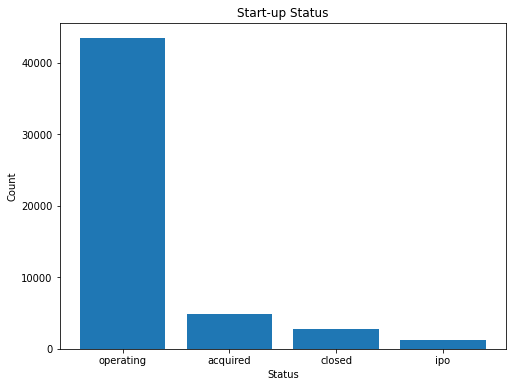

In [ ]:
import matplotlib.pyplot as plt

# Extract the values and labels from the value_counts object
values = start_up.status.value_counts().values
labels = start_up.status.value_counts().index

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart
plt.bar(labels, values)

# Add a title and x/y labels
plt.title('Start-up Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52421 entries, 0 to 217471
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  52421 non-null  object        
 1   entity_type         52421 non-null  object        
 2   entity_id           52421 non-null  int64         
 3   parent_id           0 non-null      object        
 4   name                52421 non-null  object        
 5   category_code       50964 non-null  object        
 6   status              52421 non-null  object        
 7   founded_at          43027 non-null  datetime64[ns]
 8   closed_at           2880 non-null   object        
 9   homepage_url        50589 non-null  object        
 10  logo_width          52421 non-null  float64       
 11  logo_height         52421 non-null  float64       
 12  short_description   11528 non-null  object        
 13  description         33729 non-null  object   

In [ ]:
# Find the maximum value of the "last_funding_at" column
current_date = start_up['last_funding_at'].max()

# Create a boolean mask that selects rows where the status is not"operating"
# OR (the status is "operating" &"first_funding_at" within 10 years before the current year
# AND the "last_funding_at" is more than 2 years and 6 months before the current year)
mask = (start_up['status'] != 'operating') | \
       ((start_up['status'] == 'operating') & 
        (start_up['first_funding_at'] > pd.Timestamp(2018, 1, 1) - pd.offsets.DateOffset(years=10)) &
        (start_up['last_funding_at'] < pd.Timestamp(2018, 1, 1) - pd.offsets.DateOffset(years=2, months=6)))

# Use the mask to select the rows from the DataFrame
closed_companies_df = start_up[mask].reset_index()


In [ ]:
start_up.shape

(52421, 41)

In [ ]:
# Find the maximum value of the "last_funding_at" column
current_date = start_up['last_funding_at'].max()

# Create a boolean mask that selects rows where the status is "ipo"
# OR (the status is "operating","first_funding_at" and "aquired within 10 years before the current year
# AND the "last_funding_at" is less than 2.6 years before the current year)
mask = (start_up['status'] == 'ipo') | \
       ((start_up['status'] == 'operating') & 
        (start_up['first_funding_at'] > pd.Timestamp(2018, 1, 1) - pd.offsets.DateOffset(years=10)) &
        (start_up['last_funding_at'] < pd.Timestamp(2018, 1, 1) - pd.offsets.DateOffset(years=2, months=6)))

# Use the mask to select the rows from the DataFrame
active_companies_df = start_up[mask].reset_index()


In [ ]:
active_companies_df.drop(columns='index', axis=1, inplace=True)

In [ ]:
closed_companies_df.drop(columns='index', axis=1, inplace=True)

In [ ]:
active_companies_df.shape

(35336, 41)

In [ ]:
clean_rounds = funding_rounds[np.logical_and(funding_rounds.funding_round_type != 'post_ipo_equity',funding_rounds.funding_round_type != 'post_ipo_debt')]

In [ ]:
clean_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 52927
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   funding_round_id    52928 non-null  int64         
 1   object_id           52928 non-null  object        
 2   funded_at           52680 non-null  datetime64[ns]
 3   funding_round_type  52928 non-null  category      
 4   funding_round_code  52928 non-null  category      
 5   raised_amount_usd   52928 non-null  float64       
 6   participants        52928 non-null  int64         
 7   is_first_round      52928 non-null  category      
 8   is_last_round       52928 non-null  category      
 9   source_description  43439 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
clean_rounds.sort_values(by=['object_id', 'funded_at'],ascending=True,inplace=True)

In [ ]:
clean_rounds['time_between_next_round'] = clean_rounds.groupby('object_id').funded_at.diff()

In [ ]:
active_companies_df.shape

(35336, 41)

In [ ]:
# place time_between_next_round and avg_time_between_rounds columns with a value of 0
active_companies_df['time_between_next_round'] = pd.Timedelta(0)
active_companies_df['avg_time_between_rounds'] = pd.Timedelta(0)

for name in clean_rounds.object_id.unique():
    # Select the rows for the current company
    company_df = clean_rounds[clean_rounds.object_id == name]
    
    # Check if there are more than 1 funded_at values for the company
    if len(company_df.funded_at) > 1:
        # Calculate the time between the first two funded_at values
        time_between_next_round = company_df.funded_at.values[1] - company_df.funded_at.values[0]
      
        active_companies_df.loc[active_companies_df.id == name, 'time_between_next_round'] = time_between_next_round
        
        # Calculate the average time between rounds for the current company
        times = company_df.funded_at.sort_values().diff()[1:]  # difference between  funding dates
        avg_time_between_rounds = times.mean() 

        active_companies_df.loc[active_companies_df.id == name, 'avg_time_between_rounds'] = avg_time_between_rounds



In [ ]:
active_companies_df.shape

(35336, 43)

In [ ]:
# Group by 'object_id' and compute the mean of the 'time_between_next_round' and 'raised_amount_usd' columns
avg_round_time_amount = clean_rounds.groupby('object_id').aggregate({'time_between_next_round': np.mean, 'raised_amount_usd': np.mean})


avg_round_time_amount = avg_round_time_amount.rename(columns={'time_between_next_round': 'avg_time_between_rounds', 'raised_amount_usd': 'avg_raise_usd'})


avg_round_time_amount = avg_round_time_amount.reset_index()



In [ ]:
active_companies_df = active_companies_df.merge(avg_round_time_amount, how='left', left_on='id', right_on='object_id')

In [ ]:
active_companies_df.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name', 'category_code',
       'status', 'founded_at', 'closed_at', 'homepage_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'tag_list',
       'country_code', 'state_code', 'city', 'region', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'funding_round_id',
       'object_id_x', 'funded_at', 'funding_round_type', 'funding_round_code',
       'raised_amount_usd', 'participants', 'is_first_round', 'is_last_round',
       'source_description', 'Strict', 'Linent', 'time_between_next_round',
       'avg_time_between_rounds_x', 'object_id_y', 'avg_time_between_rounds_y',
       'avg_raise_usd'],
      dtype='object')

In [ ]:
active_companies_df.shape

(35336, 46)

In [ ]:
import pickle
import os

# Create the 'data' and  Save the DataFrame to pickle 
if not os.path.exists('data'):
    os.makedirs('data')


In [ ]:
closed_companies_df.shape

(43070, 41)

In [ ]:
active_companies_df['category_code'].fillna('unknown', inplace=True)
active_companies_df['cat_list2'] = active_companies_df['category_code'].str.split('|')

In [ ]:
active_companies_df.shape

(35336, 47)

In [ ]:

closed_companies_df['category_code'].fillna('unknown', inplace=True)
closed_companies_df['cat_list1'] = closed_companies_df['category_code'].str.split('|')

# Exploring data and cleaning again !

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

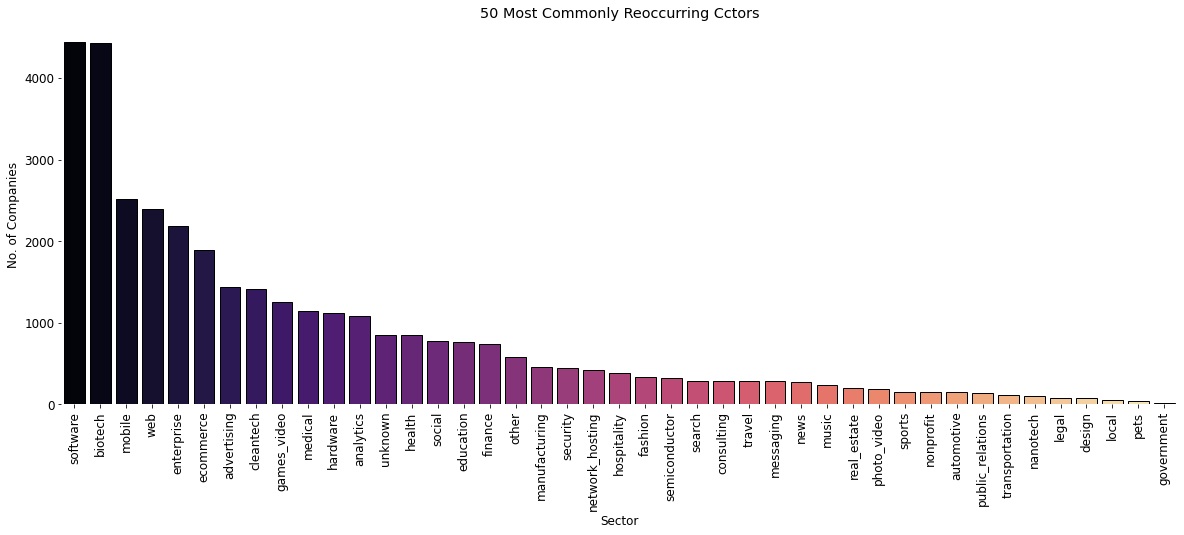

In [ ]:
# bar chart for common company sectors
cat = list(active_companies_df['cat_list2'])

flat_cat = [item for sublist in cat for item in sublist]

cat_counts2 = Counter(flat_cat).most_common()

plt.figure(figsize=(20, 7))
plt.rcParams.update({'font.size': 12})
sns.barplot(x=[x[0] for x in cat_counts2[0:50]], y=[x[1] for x in cat_counts2[0:50]],
            palette='magma', saturation=0.8,
            edgecolor='k', linewidth=1,
            errcolor='k', errwidth=1, capsize=0.1)
plt.title('50 Most Commonly Reoccurring Cctors')
plt.xlabel('Sector')
plt.ylabel('No. of Companies')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
plt.show()

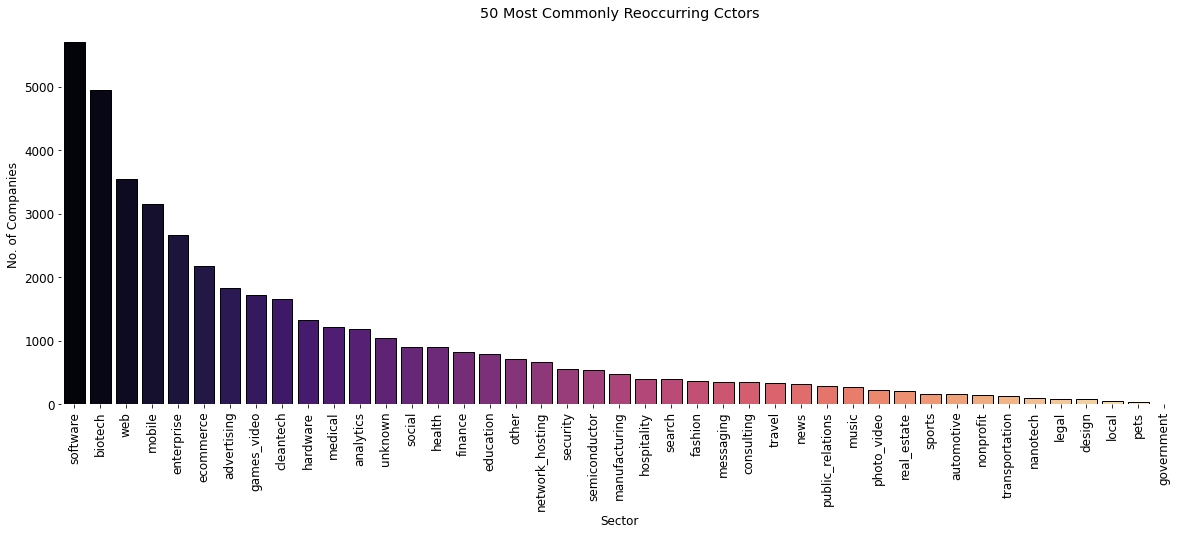

In [ ]:
# bar chart for common company sectors
cat = list(closed_companies_df['cat_list1'])

flat_cat = [item for sublist in cat for item in sublist]

cat_counts1 = Counter(flat_cat).most_common()

plt.figure(figsize=(20, 7))
plt.rcParams.update({'font.size': 12})
sns.barplot(x=[x[0] for x in cat_counts1[0:50]], y=[x[1] for x in cat_counts1[0:50]],
            palette='magma', saturation=0.8,
            edgecolor='k', linewidth=1,
            errcolor='k', errwidth=1, capsize=0.1)
plt.title('50 Most Commonly Reoccurring Cctors')
plt.xlabel('Sector')
plt.ylabel('No. of Companies')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
top_cats1 = [x[0] for x in cat_counts1[0:25]]

In [ ]:
top_cats2 = [x[0] for x in cat_counts2[0:25]]

In [ ]:
# Map the 'cat_list' column to a new list of categories
closed_companies_df['cat_list1'] = closed_companies_df['cat_list1'].apply(
    lambda x: list(set(x) & set(top_cats1)) if set(x) & set(top_cats1) else ['0_other_cat'])


In [ ]:
active_companies_df.shape

(35336, 47)

In [ ]:
# Map the 'cat_list' column  to a new list of categories
active_companies_df['cat_list2'] = active_companies_df['cat_list2'].apply(
    lambda x: list(set(x) & set(top_cats2)) if set(x) & set(top_cats2) else ['0_other_cat'])


In [ ]:
active_companies_df.shape

(35336, 47)

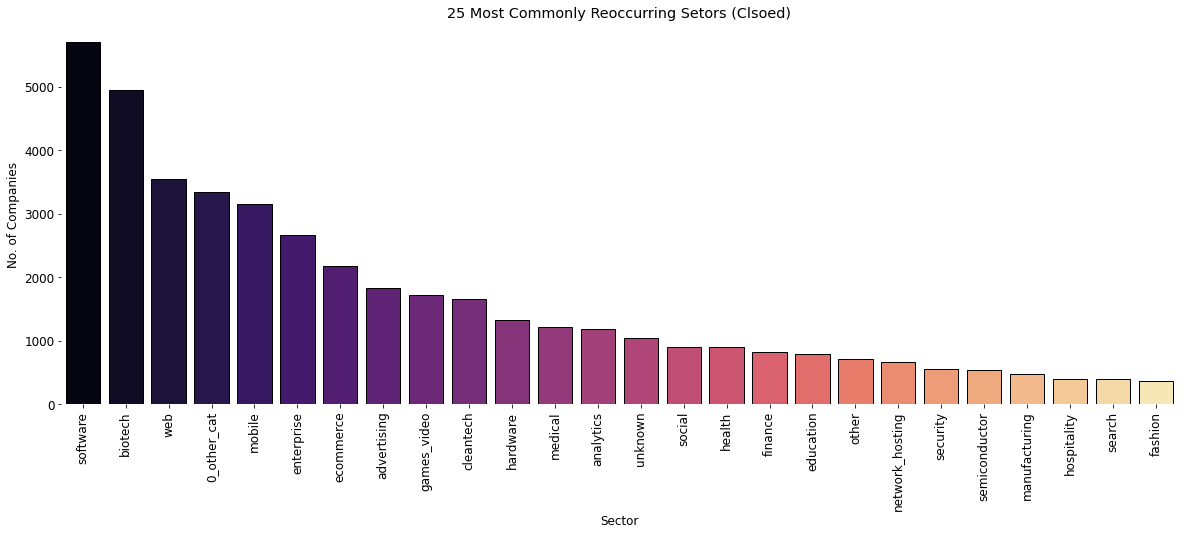

In [ ]:
categories = list(closed_companies_df.cat_list1)
# Flatten the list
flat_categories = [cat for sublist in categories for cat in sublist]
category_counts = Counter(flat_categories).most_common()

plt.figure(figsize=(20, 7))
plt.rcParams.update({'font.size': 12})
sns.barplot(x=[x[0] for x in category_counts[0:50]], y=[x[1] for x in category_counts[0:50]],
            palette='magma', saturation=0.8,
            edgecolor='k', linewidth=1,
            errcolor='k', errwidth=1, capsize=0.1)
plt.title('25 Most Commonly Reoccurring Setors (Clsoed)')
plt.xlabel('Sector')
plt.ylabel('No. of Companies')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
plt.show()

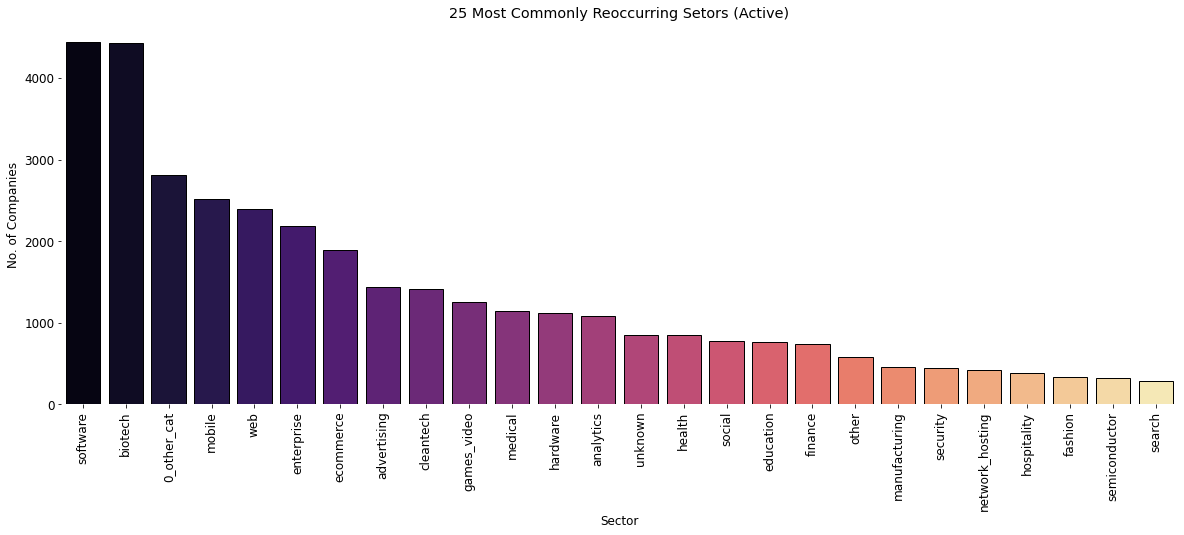

In [ ]:
categories = list(active_companies_df.cat_list2)
# Flatten the list
flat_categories = [cat for sublist in categories for cat in sublist]
category_counts = Counter(flat_categories).most_common()

plt.figure(figsize=(20, 7))
plt.rcParams.update({'font.size': 12})
sns.barplot(x=[x[0] for x in category_counts[0:50]], y=[x[1] for x in category_counts[0:50]],
            palette='magma', saturation=0.8,
            edgecolor='k', linewidth=1,
            errcolor='k', errwidth=1, capsize=0.1)
plt.title('25 Most Commonly Reoccurring Setors (Active)')
plt.xlabel('Sector')
plt.ylabel('No. of Companies')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
active_companies_df.to_pickle('data/active_companies_df.pickle')
active_companies_df.to_pickle('data/active_df_before_categories.pickle')

In [ ]:
# Load the pickle file into a DataFrame
with open('data/active_companies_df.pickle', 'rb') as f:
    active_df = pickle.load(f)


In [ ]:
active_df.head()

,id,entity_type,entity_id,parent_id,name,category_code,status,founded_at,closed_at,homepage_url,...,is_last_round,source_description,Strict,Linent,time_between_next_round,avg_time_between_rounds_x,object_id_y,avg_time_between_rounds_y,avg_raise_usd,cat_list2
0,c:10015,Company,10015,NaN,Fitbit,health,operating,2007-10-01,NaN,http://www.fitbit.com,...,1,Fitbit Raises Healthy $2 Million From True Ven...,0,1,700 days,442 days,c:10015,442 days,13613840.0,[health]
1,c:10015,Company,10015,NaN,Fitbit,health,operating,2007-10-01,NaN,http://www.fitbit.com,...,0,Fitness Tracker Fitbit Gains Another $8 Million,0,1,700 days,442 days,c:10015,442 days,13613840.0,[health]
2,c:10015,Company,10015,NaN,Fitbit,health,operating,2007-10-01,NaN,http://www.fitbit.com,...,0,Fitness Tracker Fitbit Raises $12M To Market N...,0,1,700 days,442 days,c:10015,442 days,13613840.0,[health]
3,c:10015,Company,10015,NaN,Fitbit,health,operating,2007-10-01,NaN,http://www.fitbit.com,...,0,Fitbit Raises $43 Million From Qualcomm Ventur...,0,1,700 days,442 days,c:10015,442 days,13613840.0,[health]
4,c:10015,Company,10015,NaN,Fitbit,health,operating,2007-10-01,NaN,http://www.fitbit.com,...,0,VC Funding: Q1 2012,1,1,700 days,442 days,c:10015,442 days,13613840.0,[health]


In [ ]:
import datetime as dt

In [ ]:
active_df.avg_time_between_rounds_x.replace(to_replace=dt.timedelta(days=0), value=np.nan, inplace=True)

In [ ]:
# Extract the number of days from the columns
active_df['f_time_between_next_round'] = active_df.time_between_next_round.dt.days

In [ ]:
active_df['f_avg_time_between_rounds'] = active_df.avg_time_between_rounds_x.dt.days

In [ ]:
init_size_a = active_df.shape

In [ ]:
active_df.shape

(35336, 49)

In [ ]:
# Select feature and target columns
cols = ['funding_rounds', 'cat_list2','funding_total_usd', 'f_avg_time_between_rounds','country_code', 'state_code', 'avg_raise_usd', 'f_time_between_next_round', 'Strict', 'Linent']

# Drop rows with missing values in selected columns
active_df = active_df[cols].dropna(axis=0)
active_df = active_df.reset_index(drop=True)

In [ ]:
active_df.shape

(15055, 10)

Text(0.5, 1.0, 'Total Raise Amount')

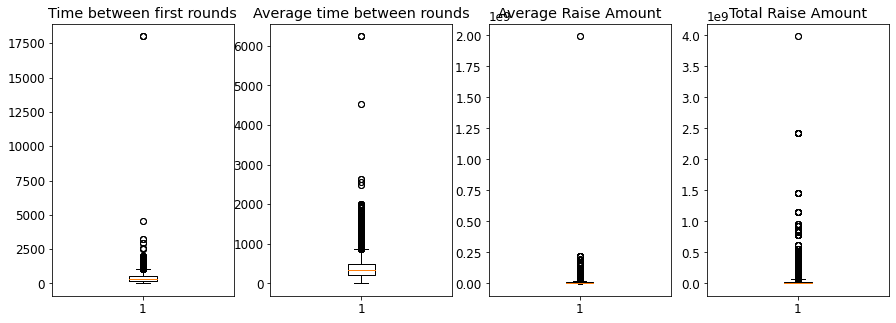

In [ ]:
#putlier boxplot
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first boxplot
ax[0].boxplot(active_df.f_time_between_next_round[active_df.f_time_between_next_round.notnull()])
ax[0].set_title('Time between first rounds')


ax[1].boxplot(active_df.f_avg_time_between_rounds[active_df.f_avg_time_between_rounds.notnull()])
ax[1].set_title('Average time between rounds')

ax[2].boxplot(active_df.avg_raise_usd[active_df.avg_raise_usd.notnull()])
ax[2].set_title('Average Raise Amount')

ax[3].boxplot(active_df.funding_total_usd[active_df.funding_total_usd.notnull()])
ax[3].set_title('Total Raise Amount')


In [ ]:
#Identify and return outliers. 
def find_outliers_a(active_df, column, lim_scalar=1.5):

    q25, q50, q75 = active_df[column].quantile(q=[0.25, 0.5, 0.75])
    iqr = q75 - q25
    # max limitsfor outlier
    max_limit = q75 + lim_scalar * iqr
   
    outlier_mask = [True if x > max_limit else False for x in active_df[column]]
    print(
        '{} outliers found out of {} data points, {:.2f}% of the data'.format(
            sum(outlier_mask), len(active_df[column]),
            100 * (sum(outlier_mask) / len(active_df[column]))))
    return outlier_mask


In [ ]:
print('outliers for: Funding total')
fund_total_outliers_a = pd.Series(find_outliers_a(active_df, 'funding_total_usd', lim_scalar=3))
print('outliers for: Avg round')
avg_raise_outliers_a = pd.Series(find_outliers_a(active_df, 'avg_raise_usd', lim_scalar=3))
print(' outliers for: Time between first rounds')
first_time_outliers_a = pd.Series(find_outliers_a(active_df, 'f_time_between_next_round', lim_scalar=1.5))
print('outliers for: Avg time between rounds')
avg_time_outliers_a = pd.Series(find_outliers_a(active_df, 'f_avg_time_between_rounds', lim_scalar=1.5))


outliers for: Funding total
852 outliers found out of 15055 data points, 5.66% of the data
outliers for: Avg round
669 outliers found out of 15055 data points, 4.44% of the data
 outliers for: Time between first rounds
554 outliers found out of 15055 data points, 3.68% of the data
outliers for: Avg time between rounds
655 outliers found out of 15055 data points, 4.35% of the data


In [ ]:
active_df.shape

(15055, 10)

In [ ]:
# Create a DataFrame with only non-outlier 
clean_df1 = active_df[~fund_total_outliers_a]
clean_df2 = active_df[~first_time_outliers_a]
clean_df3 = active_df[~avg_raise_outliers_a]
clean_df4 = active_df[~avg_time_outliers_a]

In [ ]:
# Get the intersection 
clean_df_a = active_df.loc[clean_df1.index.intersection(clean_df2.index)]
clean_df_a = active_df.loc[clean_df_a.index.intersection(clean_df3.index)]
clean_df_a = active_df.loc[clean_df_a.index.intersection(clean_df4.index)]


In [ ]:
clean_df_a.shape

(13321, 10)

In [ ]:
clean_df_a.columns

Index(['funding_rounds', 'cat_list2', 'funding_total_usd',
       'f_avg_time_between_rounds', 'country_code', 'state_code',
       'avg_raise_usd', 'f_time_between_next_round', 'Strict', 'Linent'],
      dtype='object')

In [ ]:
# Calculate the percentage of outliers removed from the active dataset
outlier_percentage = 100 * ((init_size_a[0] - clean_df_a.shape[0]) / (init_size_a[0] + clean_df_a.shape[0]))

# Print the number of outliers removed and the percentage of the active dataset
print(f'Removed {init_size_a[0] - clean_df_a.shape[0]} outliers, {outlier_percentage:.2f}% of the original dataset')

Removed 22015 outliers, 45.25% of the original dataset


In [ ]:
missing_values_count = clean_df_a.isnull().sum().sum()
missing_values_count

0

In [ ]:
clean_df_a.shape

(13321, 10)

# prediction modeling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score, recall_score,precision_recall_curve,f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Create dummy variables for the categorical features
clean_df_a['cat_list2_flat'] = clean_df_a['cat_list2'].apply(lambda x: ' '.join(x))
cat_dummies = pd.get_dummies(clean_df_a['cat_list2_flat'], drop_first=True)

country_dummies = pd.get_dummies(clean_df_a['country_code'], drop_first=True)
state_dummies = pd.get_dummies(clean_df_a['state_code'], drop_first=True)
# Merge in dummies to feature matrix


In [ ]:
# Select the non-dummy feature columns
features_no_dummies = clean_df_a[['funding_rounds', 'f_avg_time_between_rounds', 'avg_raise_usd' ,'f_time_between_next_round']]
clean_df_a.shape

(13321, 11)

## Strict - Target outcome

In [ ]:
# dummy features
X = features_no_dummies.join(cat_dummies, lsuffix='_left', rsuffix='_right').join(country_dummies, lsuffix='_left', rsuffix='_right').join(state_dummies, lsuffix='_left', rsuffix='_right')

# Add an intercept column
X['intercept'] = 1
#target variable
y = clean_df_a.Strict

In [ ]:
import joblib

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)


In [ ]:
# Sacling features for model evaluation
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=10)

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
auc_lr = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

In [ ]:
def find_best_fbeta(model, y_test, X_test):
    prob_thresholds = np.arange(0, 1, 0.005)
    fbeta = []
    for prob in prob_thresholds:
        fbeta.append(fbeta_score(y_test, model.predict_proba(X_test)[:, 1] > prob, average='macro', beta = 3))
    all_fbeta = list(zip(prob_thresholds, fbeta))
    best_fbeta = max(list(zip(prob_thresholds, fbeta)), key=lambda x: x[1])
    print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.format(best_fbeta[0], best_fbeta[1]))
    return all_fbeta, best_fbeta


In [ ]:
all_fbeta_lr, best_fbeta_lr = find_best_fbeta(logreg, y_test, X_test_scaled)
p_thresh = best_fbeta_lr[0]

Probability that yields the best fbeta score is 0.5700000000000001 with fbeta=0.627461


In [ ]:
def precision_recall(model, y_test, X_test):
  precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
  return precision_curve, recall_curve, threshold_curve

precision_curve, recall_curve, threshold_curve = precision_recall(logreg, y_test, X_test_scaled)

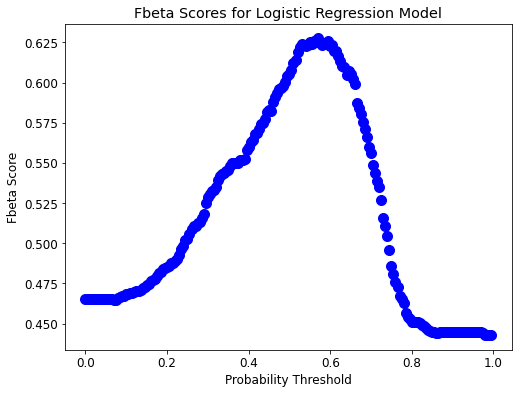

In [ ]:
import matplotlib.pyplot as plt

fbeta_LogisticRegression = np.array(all_fbeta_lr)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(fbeta_LogisticRegression[:, 0], fbeta_LogisticRegression[:, 1], s=100, c='blue')


plt.title('Fbeta Scores for Logistic Regression Model')
plt.xlabel('Probability Threshold')
plt.ylabel('Fbeta Score')

# Show the plot
plt.show()

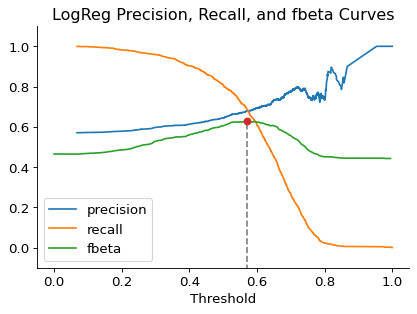

In [ ]:
# Plot the precision, recall, and fbeta curves
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:], label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(list(zip(*all_fbeta_lr))[0], list(zip(*all_fbeta_lr))[1], label='fbeta')
plt.plot([best_fbeta_lr[0], best_fbeta_lr[0]], [-1, best_fbeta_lr[1]], '--', color='black', alpha=0.5)
plt.plot(best_fbeta_lr[0], best_fbeta_lr[1], 'o')
plt.ylim([-0.1, 1.1])
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('LogReg Precision, Recall, and fbeta Curves')
sns.despine()

In [ ]:
from sklearn.metrics import classification_report

#Predict on the test data 
y_pred = logreg.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1144
           1       0.68      0.69      0.68      1521

    accuracy                           0.64      2665
   macro avg       0.63      0.63      0.63      2665
weighted avg       0.64      0.64      0.64      2665



In [ ]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

all_fbeta_knn, best_fbeta_knn = find_best_fbeta(knn, y_test, X_test)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = knn.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.0 with fbeta=0.464747
              precision    recall  f1-score   support

           0       0.57      0.51      0.53      1144
           1       0.66      0.71      0.68      1521

    accuracy                           0.62      2665
   macro avg       0.61      0.61      0.61      2665
weighted avg       0.62      0.62      0.62      2665



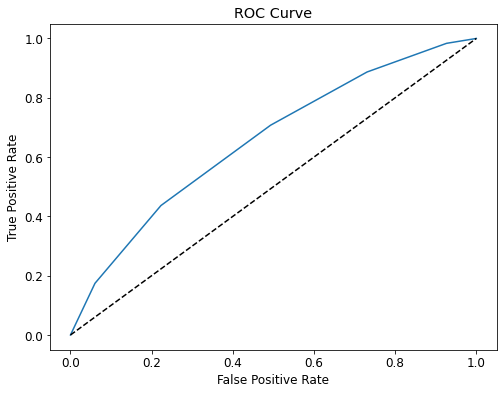

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_knn, tpr_knn)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

all_fbeta_dt, best_fbeta_dt = find_best_fbeta(dt, y_test, X_test)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])

auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = dt.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.58 with fbeta=0.649928
              precision    recall  f1-score   support

           0       0.47      0.01      0.02      1144
           1       0.57      0.99      0.72      1521

    accuracy                           0.57      2665
   macro avg       0.52      0.50      0.37      2665
weighted avg       0.53      0.57      0.42      2665



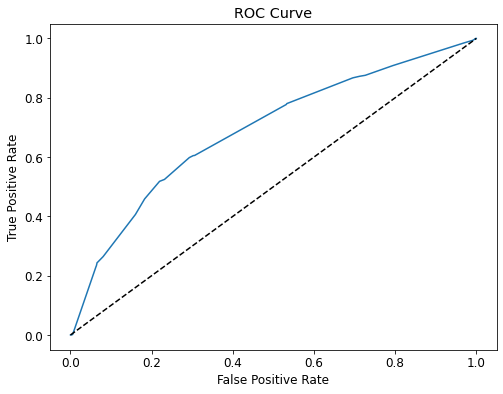

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_dt, tpr_dt)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Train a Naive Bayes Gaussian model
nbg = GaussianNB()
nbg.fit(X_train_scaled, y_train)

all_fbeta_nbg, best_fbeta_nbg = find_best_fbeta(nbg, y_test, X_test_scaled)


fpr_nbg, tpr_nbg, thresholds_nbg = roc_curve(y_test, nbg.predict_proba(X_test_scaled)[:, 1])

auc_nbg = roc_auc_score(y_test, nbg.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = nbg.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))


Probability that yields the best fbeta score is 0.0 with fbeta=0.465024
              precision    recall  f1-score   support

           0       0.43      0.97      0.60      1144
           1       0.65      0.05      0.09      1521

    accuracy                           0.44      2665
   macro avg       0.54      0.51      0.34      2665
weighted avg       0.56      0.44      0.31      2665



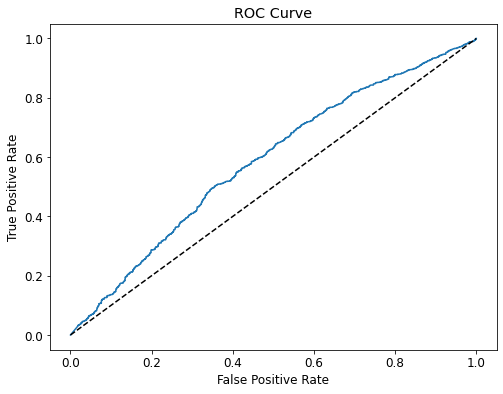

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_nbg, tpr_nbg)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Train a Naive Bayes Bernoulli model
nbb = BernoulliNB()
nbb.fit(X_train_scaled, y_train)



all_fbeta_nbb, best_fbeta_nbb = find_best_fbeta(nbb, y_test, X_test_scaled)

fpr_nbb, tpr_nbb, thresholds_nbb = roc_curve(y_test, nbb.predict_proba(X_test_scaled)[:, 1])


auc_nbb = roc_auc_score(y_test, nbb.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = nbb.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.53 with fbeta=0.629773
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1144
           1       0.68      0.69      0.68      1521

    accuracy                           0.63      2665
   macro avg       0.63      0.63      0.63      2665
weighted avg       0.63      0.63      0.63      2665



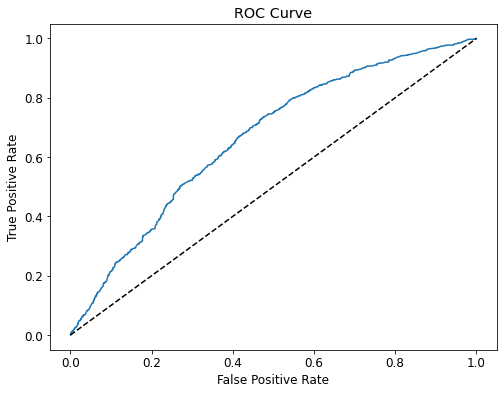

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_nbb, tpr_nbb)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Training a svm model
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train_scaled, y_train)


all_fbeta_svm, best_fbeta_svm = find_best_fbeta(svm, y_test, X_test_scaled)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])


auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = svm.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.58 with fbeta=0.642816
              precision    recall  f1-score   support

           0       0.61      0.53      0.56      1144
           1       0.68      0.74      0.71      1521

    accuracy                           0.65      2665
   macro avg       0.64      0.63      0.63      2665
weighted avg       0.65      0.65      0.65      2665



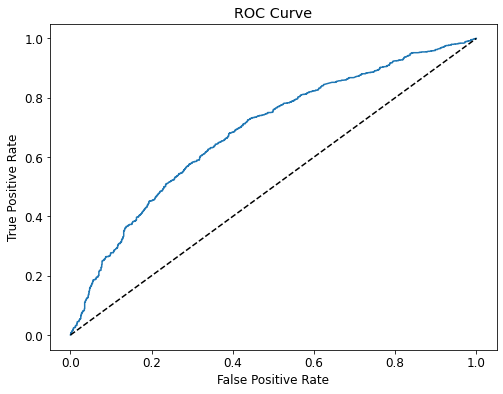

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_svm, tpr_svm)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#Training a XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)


all_fbeta_xgb, best_fbeta_xgb = find_best_fbeta(xgb, y_test, X_test_scaled)


fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb.predict_proba(X_test_scaled)[:, 1])

auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = xgb.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.5700000000000001 with fbeta=0.654704
              precision    recall  f1-score   support

           0       0.58      0.70      0.63      1144
           1       0.73      0.61      0.67      1521

    accuracy                           0.65      2665
   macro avg       0.65      0.66      0.65      2665
weighted avg       0.67      0.65      0.65      2665



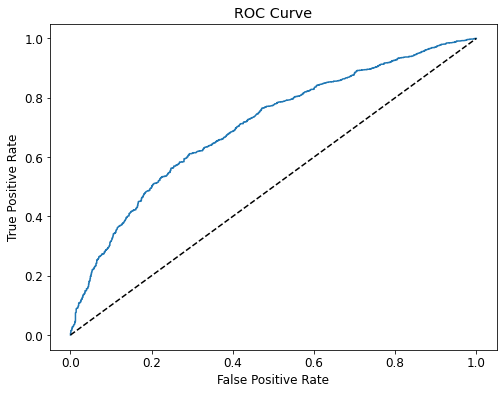

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_xgb, tpr_xgb)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#Training a Random Forest model
rf = RandomForestClassifier(n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            random_state=1234,
                            n_jobs=-1)
rf.fit(X_train_scaled, y_train)

all_fbeta_rf, best_fbeta_rf = find_best_fbeta(rf, y_test, X_test_scaled)


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = rf.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.525 with fbeta=0.646609
              precision    recall  f1-score   support

           0       0.57      0.66      0.61      1144
           1       0.71      0.63      0.67      1521

    accuracy                           0.64      2665
   macro avg       0.64      0.64      0.64      2665
weighted avg       0.65      0.64      0.64      2665



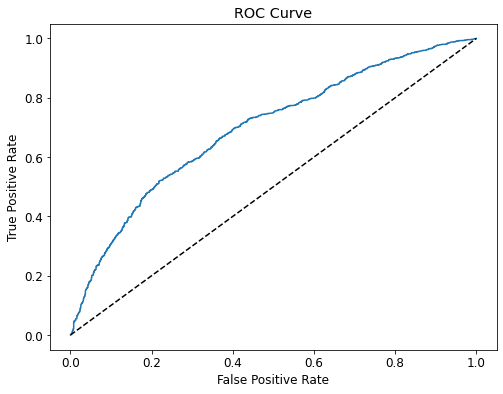

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_rf, tpr_rf)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#training a Bagged Decision Tree
getthebag = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,
                           bootstrap=True,
                           oob_score=True,
                           random_state=1234,
                           n_jobs=-1)
getthebag.fit(X_train_scaled, y_train)


all_fbeta_getthebag, best_fbeta_getthebag = find_best_fbeta(getthebag, y_test, X_test_scaled)

fpr_getthebag, tpr_getthebag, thresholds_getthebag = roc_curve(y_test, getthebag.predict_proba(X_test_scaled)[:, 1])

auc_getthebag = roc_auc_score(y_test, getthebag.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = getthebag.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.785 with fbeta=0.642713
              precision    recall  f1-score   support

           0       0.57      0.66      0.61      1144
           1       0.71      0.62      0.66      1521

    accuracy                           0.64      2665
   macro avg       0.64      0.64      0.64      2665
weighted avg       0.65      0.64      0.64      2665



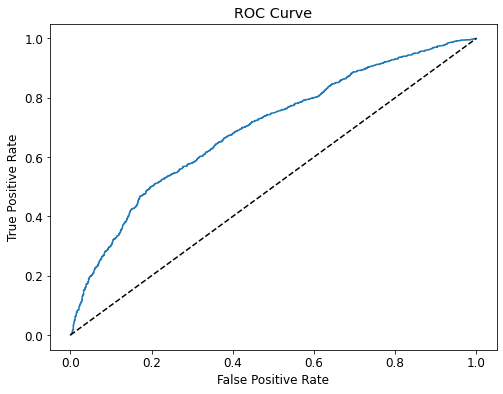

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_getthebag, tpr_getthebag)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#Define a list of models
models = [getthebag, dt, rf, svm, knn, nbb, nbg, xgb, logreg]

#Define a list of model names
model_names = [ 'Logistic Regression', 'Decision Tree', 'KNN', 'Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'Support Vector Machine', 'XGBoost', 'Bagged Decision Tree', 'Random Forest']

model_aucs = [auc_getthebag, auc_dt, auc_rf, auc_svm, auc_knn, auc_nbb, auc_nbg, auc_xgb, auc_lr]
model_fbetas = [best_fbeta_getthebag, best_fbeta_rf, best_fbeta_svm, best_fbeta_nbb, best_fbeta_nbg, best_fbeta_xgb, best_fbeta_rf, best_fbeta_dt, best_fbeta_lr]

In [ ]:
# Train and evaluate each model
for model, model_name in zip(models, model_names):
    if model_name in ['Bernoulli Naive Bayes', 'Gaussian Naive Bayes']:
        
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
        X_test_X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    model.fit(X_train_scaled, y_train)
    
    all_fbeta, best_fbeta = find_best_fbeta(model, y_test = y_test, X_test = X_test_scaled)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    model_aucs.append(auc)
    model_fbetas.append(best_fbeta[1])

Probability that yields the best fbeta score is 0.765 with fbeta=0.642877
Probability that yields the best fbeta score is 0.58 with fbeta=0.650690
Probability that yields the best fbeta score is 0.505 with fbeta=0.649441
Probability that yields the best fbeta score is 0.58 with fbeta=0.642478
Probability that yields the best fbeta score is 0.4 with fbeta=0.607130
Probability that yields the best fbeta score is 0.5650000000000001 with fbeta=0.560347
Probability that yields the best fbeta score is 0.66 with fbeta=0.620656
Probability that yields the best fbeta score is 0.5700000000000001 with fbeta=0.654704
Probability that yields the best fbeta score is 0.495 with fbeta=0.603746


In [ ]:
# Find the highest AUC score
best_auc = model_aucs.index(max(model_aucs))

if any(model_fbetas):
    best_fbeta = np.argmax(model_fbetas[1])
else:
    best_fbeta = None
    
# Print the  best model based on acu score
print(f'The best model based on AUC is: {model_names[best_auc]}')
# Print the  best model based on Fbeta score
print(f'The best model based on Fbeta score is: {model_names[best_fbeta]}')


The best model based on AUC is: Bagged Decision Tree
The best model based on Fbeta score is: Decision Tree


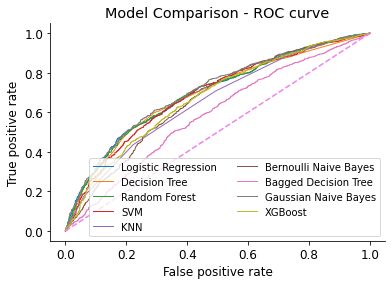

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fprs = [fpr_getthebag, fpr_dt, fpr_rf, fpr_svm, fpr_knn, fpr_nbb, fpr_nbg, fpr_xgb, fpr_lr]
tprs = [tpr_getthebag, tpr_dt, tpr_rf, tpr_svm, tpr_knn, tpr_nbb, tpr_nbg, tpr_xgb, tpr_lr]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Bernoulli Naive Bayes', 'Bagged Decision Tree', 'Gaussian Naive Bayes', 'XGBoost']


for fpr, tpr, name in zip(fprs, tprs, names):
  plt.plot(fpr, tpr, lw=1, label=name)

#Plot 
plt.plot([0, 1], [0, 1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Model Comparison - ROC curve')
plt.legend(ncol=2, fontsize='small')
sns.despine()

##  Linent --*yes its a copy from the above, yes i got lazy*

In [ ]:
# Add an intercept column
X['intercept'] = 1
# Define the target variable
y = clean_df_a.Linent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

In [ ]:
logreg = LogisticRegression(C=10, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=10)

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
auc_lr = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])


In [ ]:
def find_best_fbeta(model, y_test, X_test):
    prob_thresholds = np.arange(0, 1, 0.005)
    fbeta = []
    for prob in prob_thresholds:
        fbeta.append(fbeta_score(y_test, model.predict_proba(X_test)[:, 1] > prob, average='macro', beta = 3))
    all_fbeta = list(zip(prob_thresholds, fbeta))
    best_fbeta = max(list(zip(prob_thresholds, fbeta)), key=lambda x: x[1])
    print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.format(best_fbeta[0], best_fbeta[1]))
    return all_fbeta, best_fbeta

In [ ]:
all_fbeta_lr, best_fbeta_lr = find_best_fbeta(logreg, y_test, X_test_scaled)
p_thresh = best_fbeta_lr[0]


Probability that yields the best fbeta score is 0.845 with fbeta=0.589904


In [ ]:
def precision_recall(model, y_test, X_test):
  precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
  return precision_curve, recall_curve, threshold_curve

precision_curve, recall_curve, threshold_curve = precision_recall(logreg, y_test, X_test_scaled)

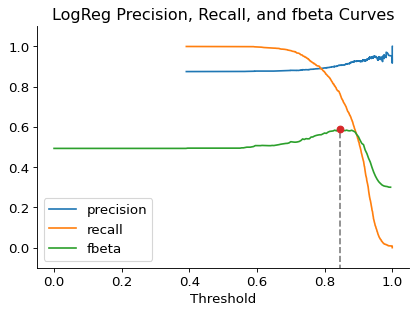

In [ ]:
# Plot the precision, recall, and fbeta curves
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:], label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(list(zip(*all_fbeta_lr))[0], list(zip(*all_fbeta_lr))[1], label='fbeta')
plt.plot([best_fbeta_lr[0], best_fbeta_lr[0]], [-1, best_fbeta_lr[1]], '--', color='black', alpha=0.5)
plt.plot(best_fbeta_lr[0], best_fbeta_lr[1], 'o')
plt.ylim([-0.1, 1.1])
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('LogReg Precision, Recall, and fbeta Curves')
sns.despine()

In [ ]:
from sklearn.metrics import classification_report

#Predict on the test data using the probability threshold that yields the best fbeta score
y_pred = logreg.predict_proba(X_test_scaled)[:, 1] > p_thresh

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.44      0.29       335
           1       0.91      0.77      0.83      2330

    accuracy                           0.73      2665
   macro avg       0.56      0.61      0.56      2665
weighted avg       0.82      0.73      0.76      2665



In [ ]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

all_fbeta_knn, best_fbeta_knn = find_best_fbeta(knn, y_test, X_test_scaled)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = knn.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))


Probability that yields the best fbeta score is 0.6 with fbeta=0.567319
              precision    recall  f1-score   support

           0       0.17      0.58      0.27       335
           1       0.91      0.61      0.73      2330

    accuracy                           0.60      2665
   macro avg       0.54      0.59      0.50      2665
weighted avg       0.82      0.60      0.67      2665



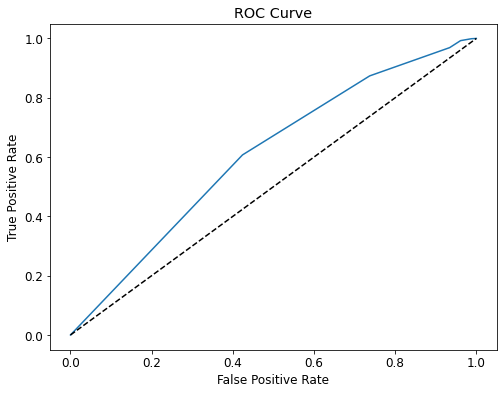

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_knn, tpr_knn)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

all_fbeta_dt, best_fbeta_dt = find_best_fbeta(dt, y_test, X_test)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])

auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = dt.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.84 with fbeta=0.583732
              precision    recall  f1-score   support

           0       0.13      1.00      0.22       335
           1       0.00      0.00      0.00      2330

    accuracy                           0.13      2665
   macro avg       0.06      0.50      0.11      2665
weighted avg       0.02      0.13      0.03      2665



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


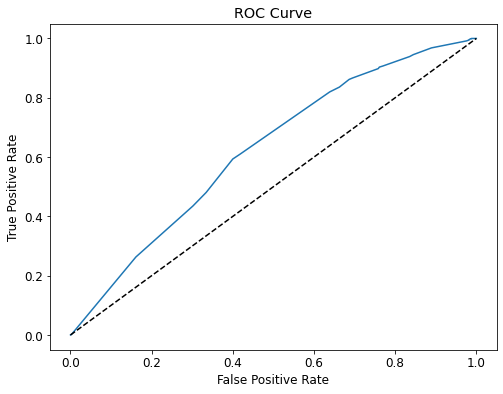

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_dt, tpr_dt)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Train a Naive Bayes Gaussian model
nbg = GaussianNB()
nbg.fit(X_train_scaled, y_train)

all_fbeta_nbg, best_fbeta_nbg = find_best_fbeta(nbg, y_test, X_test_scaled)


fpr_nbg, tpr_nbg, thresholds_nbg = roc_curve(y_test, nbg.predict_proba(X_test_scaled)[:, 1])

auc_nbg = roc_auc_score(y_test, nbg.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = nbg.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.0 with fbeta=0.494018
              precision    recall  f1-score   support

           0       0.13      0.99      0.23       335
           1       0.95      0.02      0.05      2330

    accuracy                           0.15      2665
   macro avg       0.54      0.51      0.14      2665
weighted avg       0.85      0.15      0.07      2665



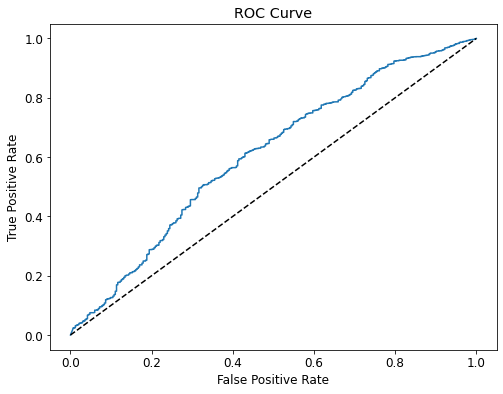

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_nbg, tpr_nbg)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Train a Naive Bayes Bernoulli model
nbb = BernoulliNB()
nbb.fit(X_train_scaled, y_train)


all_fbeta_nbb, best_fbeta_nbb = find_best_fbeta(nbb, y_test, X_test_scaled)

fpr_nbb, tpr_nbb, thresholds_nbb = roc_curve(y_test, nbb.predict_proba(X_test_scaled)[:, 1])

auc_nbb = roc_auc_score(y_test, nbb.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = nbb.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))


Probability that yields the best fbeta score is 0.84 with fbeta=0.580493
              precision    recall  f1-score   support

           0       0.21      0.41      0.28       335
           1       0.90      0.77      0.83      2330

    accuracy                           0.73      2665
   macro avg       0.55      0.59      0.55      2665
weighted avg       0.81      0.73      0.76      2665



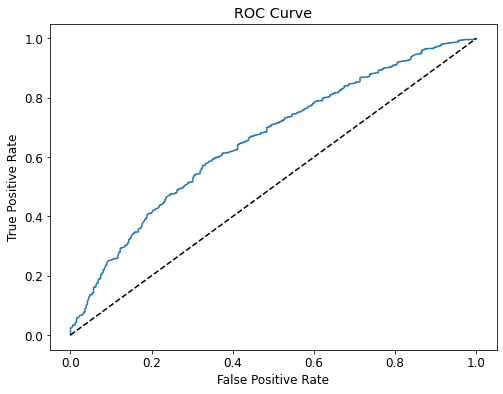

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_nbb, tpr_nbb)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
from sklearn.svm import LinearSVC, SVC
# Training a svm model
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train_scaled, y_train)


all_fbeta_svm, best_fbeta_svm = find_best_fbeta(svm, y_test, X_test_scaled)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])


auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = svm.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))

Probability that yields the best fbeta score is 0.0 with fbeta=0.492913
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.87      1.00      0.93      2330

    accuracy                           0.87      2665
   macro avg       0.44      0.50      0.47      2665
weighted avg       0.76      0.87      0.82      2665



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


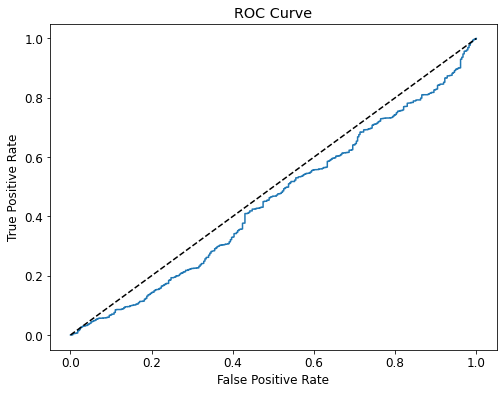

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_svm, tpr_svm)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#Training a XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)


all_fbeta_xgb, best_fbeta_xgb = find_best_fbeta(xgb, y_test, X_test_scaled)


fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb.predict_proba(X_test_scaled)[:, 1])

auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = xgb.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))


Probability that yields the best fbeta score is 0.855 with fbeta=0.604551
              precision    recall  f1-score   support

           0       0.23      0.43      0.30       335
           1       0.91      0.79      0.84      2330

    accuracy                           0.74      2665
   macro avg       0.57      0.61      0.57      2665
weighted avg       0.82      0.74      0.77      2665



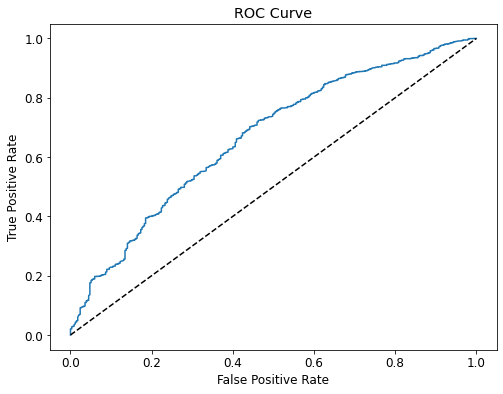

In [ ]:
#Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_xgb, tpr_xgb)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#Training a Random Forest model
rf = RandomForestClassifier(n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            random_state=1234,
                            n_jobs=-1)
rf.fit(X_train_scaled, y_train)

all_fbeta_rf, best_fbeta_rf = find_best_fbeta(rf, y_test, X_test_scaled)


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = rf.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))


Probability that yields the best fbeta score is 0.87 with fbeta=0.624627
              precision    recall  f1-score   support

           0       0.26      0.44      0.33       335
           1       0.91      0.82      0.86      2330

    accuracy                           0.77      2665
   macro avg       0.59      0.63      0.60      2665
weighted avg       0.83      0.77      0.80      2665



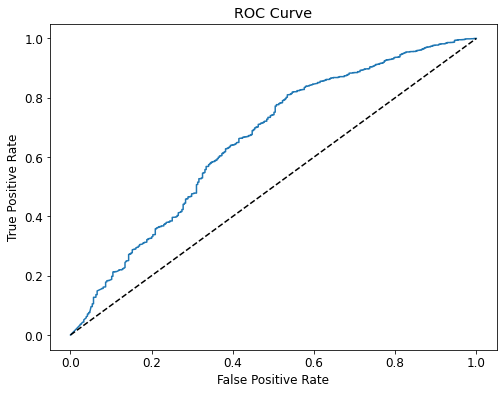

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_rf, tpr_rf)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
#training a Bagged Decision Tree
getthebag = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,
                           bootstrap=True,
                           oob_score=True,
                           random_state=1234,
                           n_jobs=-1)
getthebag.fit(X_train_scaled, y_train)


all_fbeta_getthebag, best_fbeta_getthebag = find_best_fbeta(getthebag, y_test, X_test_scaled)

fpr_getthebag, tpr_getthebag, thresholds_getthebag = roc_curve(y_test, getthebag.predict_proba(X_test_scaled)[:, 1])

auc_getthebag = roc_auc_score(y_test, getthebag.predict_proba(X_test_scaled)[:, 1])
#Predict on the test data 
y_pred = getthebag.predict_proba(X_test_scaled)[:, 1] > p_thresh

# Print the classification report
print(classification_report(y_test, y_pred))


Probability that yields the best fbeta score is 0.85 with fbeta=0.629080
              precision    recall  f1-score   support

           0       0.26      0.46      0.33       335
           1       0.91      0.82      0.86      2330

    accuracy                           0.77      2665
   macro avg       0.59      0.64      0.60      2665
weighted avg       0.83      0.77      0.80      2665



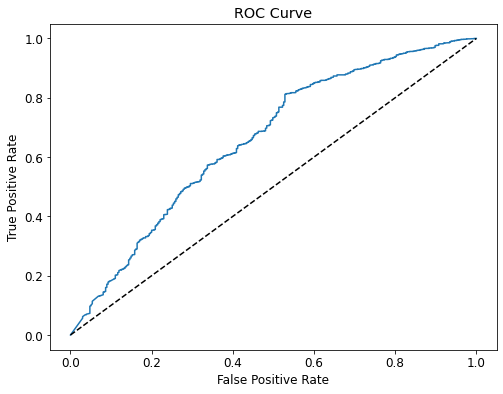

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the false positive rate and true positive rate
plt.plot(fpr_getthebag, tpr_getthebag)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Add a title and x/y labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

In [ ]:
# Define a list of models
models = [getthebag, dt, rf, svm, knn, nbb, nbg, xgb]

# Define a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Bernoulli Naive Bayes','Gaussian Naive Bayes', 'Support Vector Machine', 'XGBoost', 'Bagged Decision Tree', 'Random Forest']

# Define a list for model fbeta scores
model_aucs = [auc_getthebag, auc_dt, auc_rf, auc_svm, auc_knn, auc_nbb, auc_nbg, auc_xgb]

# Define a list for model fbeta scores
model_fbetas = [best_fbeta_getthebag, best_fbeta_rf, best_fbeta_svm, best_fbeta_nbb, best_fbeta_nbg, best_fbeta_xgb, best_fbeta_rf, best_fbeta_dt]

In [ ]:
# Train and evaluate each model
for model, model_name in zip(models, model_names):
    if model_name in ['Bernoulli Naive Bayes', 'Gaussian Naive Bayes']:
        
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
        X_test_X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    model.fit(X_train_scaled, y_train)
    
    all_fbeta, best_fbeta = find_best_fbeta(model, y_test = y_test, X_test = X_test_scaled) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    model_aucs.append(auc)
    model_fbetas.append(best_fbeta[1])


Probability that yields the best fbeta score is 0.85 with fbeta=0.628820
Probability that yields the best fbeta score is 0.84 with fbeta=0.583732
Probability that yields the best fbeta score is 0.85 with fbeta=0.624349
Probability that yields the best fbeta score is 0.8250000000000001 with fbeta=0.493967
Probability that yields the best fbeta score is 0.6 with fbeta=0.567319
Probability that yields the best fbeta score is 0.84 with fbeta=0.574680
Probability that yields the best fbeta score is 0.84 with fbeta=0.542549
Probability that yields the best fbeta score is 0.855 with fbeta=0.604551


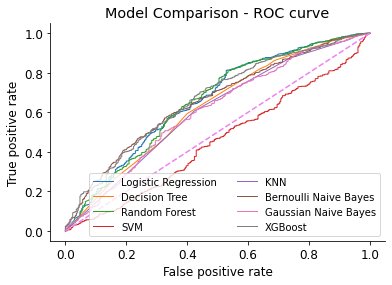

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fprs = [fpr_getthebag, fpr_dt, fpr_rf, fpr_svm, fpr_knn, fpr_nbb, fpr_nbg, fpr_xgb, fpr_lr]
tprs = [tpr_getthebag, tpr_dt, tpr_rf, tpr_svm, tpr_knn, tpr_nbb, tpr_nbg, tpr_xgb, tpr_lr]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'XGBoost']


for fpr, tpr, name in zip(fprs, tprs, names):
  plt.plot(fpr, tpr, lw=1, label=name)

#Plot 
plt.plot([0, 1], [0, 1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Model Comparison - ROC curve')
plt.legend(ncol=2, fontsize='small')
sns.despine()


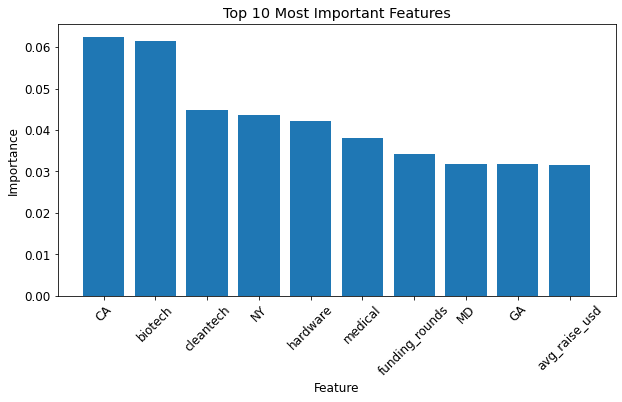

In [ ]:
# Calculate the feature importances
importances = model.feature_importances_

# Sort the feature importances
sorted_index = np.argsort(importances)[::-1]

feature_names = list(X.columns)

# Create a bar plot of the top 10 most important features
plt.figure(figsize=(10, 5))
plt.bar(range(10), importances[sorted_index][:10], align='center')
plt.xticks(range(10), [feature_names[i] for i in sorted_index[:10]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.show()

In [ ]:
# Find the highest AUC score
best_auc = model_aucs.index(max(model_aucs))

if any(model_fbetas):
    best_fbeta = np.argmax(model_fbetas[1])
else:
    best_fbeta = None
    
# Print the  best model based on acu score
print(f'The best model based on AUC is: {model_names[best_auc]}')
# Print the  best model based on Fbeta score
print(f'The best model based on Fbeta score is: {model_names[best_fbeta]}')

The best model based on AUC is: Bagged Decision Tree
The best model based on Fbeta score is: Logistic Regression
